# Linear Regression


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
salary = pd.read_csv('Salary_Data.csv')
print(salary.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [ ]:
5X = salary[["YearsExperience"]]
y = salary[["Salary"]]
print(X.size, y.size)

30 30


In [ ]:
X["intercept"] = 1

In [ ]:
X.head()

,YearsExperience,intercept
0,1.1,1
1,1.3,1
2,1.5,1
3,2.0,1
4,2.2,1


In [ ]:
X_T = X.T

In [ ]:
X_T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
YearsExperience,1.1,1.3,1.5,2.0,2.2,2.9,3.0,3.2,3.2,3.7,...,6.8,7.1,7.9,8.2,8.7,9.0,9.5,9.6,10.3,10.5
intercept,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
B = np.linalg.inv(X_T @ X) @ X_T @ y

In [ ]:
B.index = X.columns

In [ ]:
predictions = X @ B
print(predictions)

           Salary
0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
5    53197.090931
6    54142.087163
7    56032.079627
8    56032.079627
9    60757.060788
10   62647.053252
11   63592.049484
12   63592.049484
13   64537.045717
14   68317.030645
15   72097.015574
16   73987.008038
17   75877.000502
18   81546.977895
19   82491.974127
20   90051.943985
21   92886.932681
22  100446.902538
23  103281.891235
24  108006.872395
25  110841.861092
26  115566.842252
27  116511.838485
28  123126.812110
29  125016.804574


In [ ]:
SSR = ((((y - predictions) ** 2).sum() / len(y))**0.5) / y.mean()
print(SSR)

Profit    0.079057
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

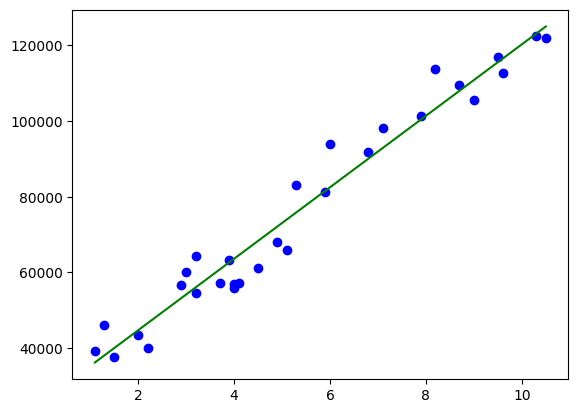

In [ ]:
plt.scatter(X['YearsExperience'], y, color="b")
plt.plot(X, predictions, color="g")

# Multiple Regression

In [ ]:
startups = pd.read_csv('50_Startups.csv')
print(startups.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
X = startups[["R&D Spend", "Administration", "Marketing Spend"]]
y = startups[["Profit"]]
print(X.shape, y.size)


(50, 3) 50


In [ ]:
X["intercept"] = 1

<ipython-input-46-fa079dcf9bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["intercept"] = 1


In [ ]:
X_T = X.T

In [ ]:
B = np.linalg.inv(X_T @ X) @ X_T @ y
B.index = X.columns
print(B)

                       Profit
R&D Spend            0.805715
Administration      -0.026816
Marketing Spend      0.027228
intercept        50122.192990


In [ ]:
predictions = X @ B
print(predictions)

           Profit
0   192521.252890
1   189156.768232
2   182147.279096
3   173696.700026
4   172139.514183
5   163580.780571
6   158114.096669
7   160021.363048
8   151741.699699
9   154884.684110
10  135509.016367
11  135573.712961
12  129138.054182
13  127487.991663
14  149548.646335
15  146235.159985
16  116915.405401
17  130192.447208
18  129014.226806
19  115635.216367
20  116639.669231
21  117319.451640
22  114706.981717
23  109996.615221
24  113362.966113
25  102237.725065
26  110600.575350
27  114408.071457
28  101660.026005
29  101794.983452
30   99452.372936
31   97687.856276
32   99001.328985
33   97915.007805
34   89039.273741
35   90511.599568
36   75286.174585
37   89619.537708
38   69697.430648
39   83729.011977
40   74815.953991
41   74802.556239
42   70620.411821
43   60167.039963
44   64611.354916
45   47650.649687
46   56166.206853
47   46490.588983
48   49171.388158
49   48215.134111


In [ ]:
# plt.scatter(X['R&D Spend'], y, color="b")
# plt.scatter(X['Administration'], y, color="y")
# plt.scatter(X['Marketing Spend'], y, color="r")
# plt.plot(X, predictions, color="g")
RMSE= ((((y - predictions) ** 2).sum() / len(y))**0.5) / y.mean()
print(RMSE)

Profit    0.079057
dtype: float64


# Logistic Regression

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y,A))
            dz = A - y # derivative of sigmoid and bce X.T*(A-y)
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)


from sklearn.model_selection import train_test_split
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

def confusion_matrix(y_actual, y_predicted):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    epsilon = 1e-9
    for i in range(len(y_actual)):
        if y_actual[i] > 0:
            if y_actual[i] == y_predicted[i]:
                tp = tp + 1
            else:
                fn = fn + 1
        if y_actual[i] < 1:
            if y_actual[i] == y_predicted[i]:
                tn = tn + 1
            else:
                fp = fp + 1

    cm = [[tn, fp], [fn, tp]]
    accuracy = (tp+tn)/(tp+tn+fp+fn+epsilon)
    sens = tp/(tp+fn+epsilon)
    prec = tp/(tp+fp+epsilon)
    f_score = (2*prec*sens)/(prec+sens+epsilon)
    return cm,accuracy,sens,prec,f_score

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
cm ,accuracy,sens,precision,f_score  = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
print("Test accuracy: {0:.3f}".format(accuracy))
print("Confusion Matrix:",cm)

Test accuracy: 0.930
Confusion Matrix: [[39, 6], [2, 67]]
